In [1]:
import pickle 
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community
from fa2_modified import ForceAtlas2
from collections import Counter
import seaborn as sns
from matplotlib.colors import LogNorm

G = pickle.load(open('G_politicans_final.pickle', 'rb'))

In [2]:
H = G.to_undirected()

In [8]:
len(list(nx.isolates(G)))

376

In [5]:
# Initialize ForceAtlas2 layout
forceatlas2 = ForceAtlas2(
    # Behavior alternatives
    outboundAttractionDistribution=True,  # Dissuade hubs
    linLogMode=False,  # linear attraction (default)
    adjustSizes=False,  # Prevent overlap
    edgeWeightInfluence=1.0,

    # Performance and scaling
    jitterTolerance=1.0,  # Tolerance
    barnesHutOptimize=True,  # Optimize for larger graphs
    barnesHutTheta=1.2,
    scalingRatio=4.0,
    strongGravityMode=False,
    gravity=0.8,
    # Log
    verbose=True
)

# Apply the ForceAtlas2 layout to the graph
positions = forceatlas2.forceatlas2_networkx_layout(H, iterations=100)

100%|██████████| 100/100 [04:50<00:00,  2.91s/it]

BarnesHut Approximation  took  19.71  seconds
Repulsion forces  took  268.28  seconds
Gravitational forces  took  0.27  seconds
Attraction forces  took  0.23  seconds
AdjustSpeedAndApplyForces step  took  1.01  seconds


C:\Users\Mathilde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\networkx\drawing\nx_pylab.py:433: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


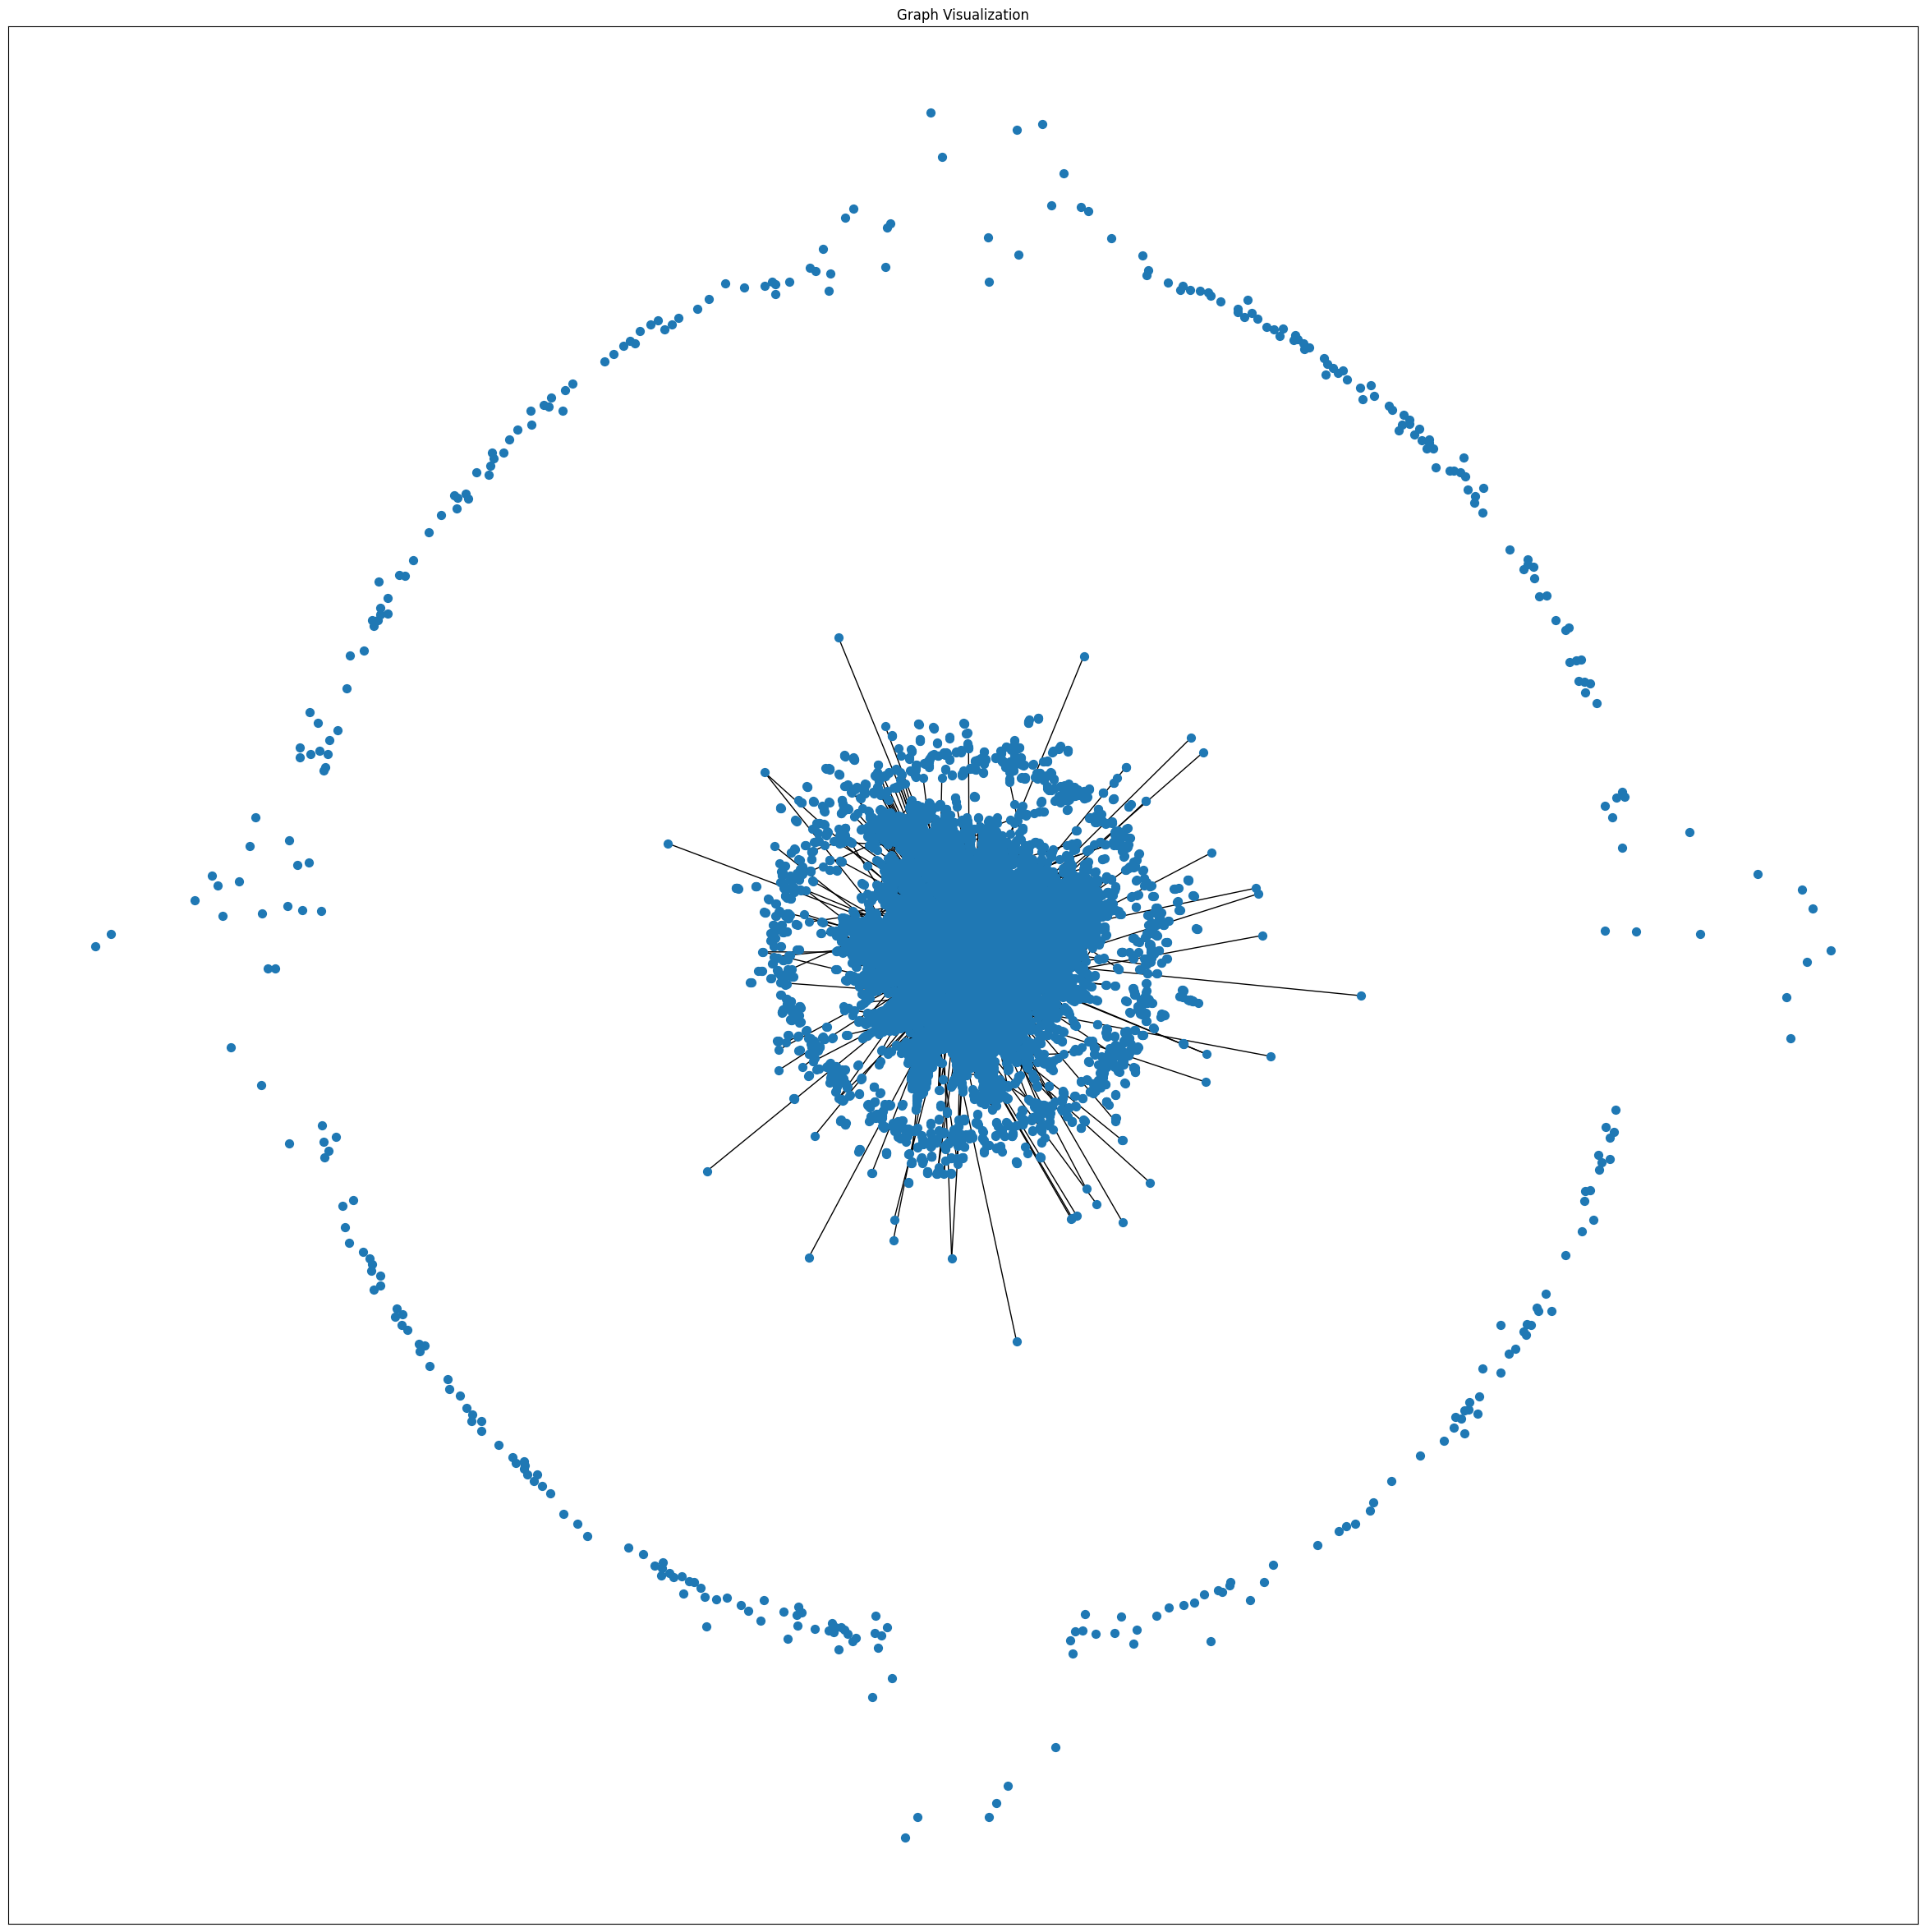

In [6]:
# Plot the graph
plt.figure(figsize=(30, 30))
nx.draw_networkx(
    H, pos=positions, with_labels=False, node_size=50, cmap=plt.cm.jet
)
plt.title("Graph Visualization")
plt.show()